# Compute Vision with Deep Learning

## 

In [1]:
#pip install bing-image-downloader

Note: you may need to restart the kernel to use updated packages.


In [2]:
from bing_image_downloader import downloader

In [3]:
downloader.download('horse',limit=100,adult_filter_off=False) #Ne yazarsak ona göre resim download ediyor 

[%] Downloading Images to /home/sifa/projects/ai/Day09/dataset/horse


[!!]Indexing page: 1

[%] Indexed 95 Images on Page 1.


[%] Downloading Image #1 from https://www.thesprucepets.com/thmb/d7HzCU0Al_KrpBh9TL_7bhsjadA=/3865x2576/filters:fill(auto,1)/horse-galloping-in-grass-688899769-587673275f9b584db3a44cdf.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.treehugger.com/thmb/Hlt6Q0rgpS17xAkCSqtvUY6_T80=/2121x1414/filters:fill(auto,1)/horse.primary-e9a47e1c486c4fb7bf729e05b59cf0df.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.globetrotting.com.au/20220711114601/shutterstock_1508878307.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i2.wp.com/ihearthorses.com/wp-content/uploads/2020/06/Canva-Black-Friesian-horse-gallops-at-sunset-scaled.jpg
[!] Issue getting: https://i2.wp.com/ihearthorses.com/wp-content/uploads/2020/06/Canva-Black-Friesian-horse-gallops-at-sunset-scaled.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Download

In [4]:
import tensorflow as tf

2024-08-24 14:09:26.012301: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-24 14:09:26.012849: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-24 14:09:26.015559: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-24 14:09:26.022458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 14:09:26.035078: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [5]:
mnist = tf.keras.datasets.mnist # kağıt üstünde yazdığınız el yazısını tanımlama 

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
import matplotlib.pyplot as plt

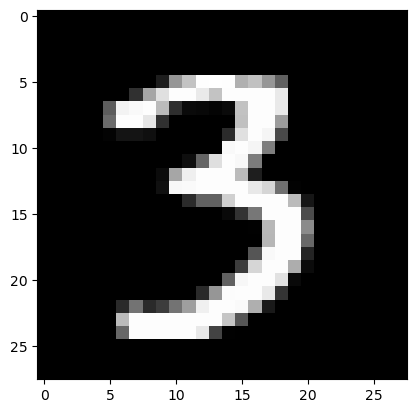

In [10]:
plt.imshow(train_images[10000],cmap='gray')

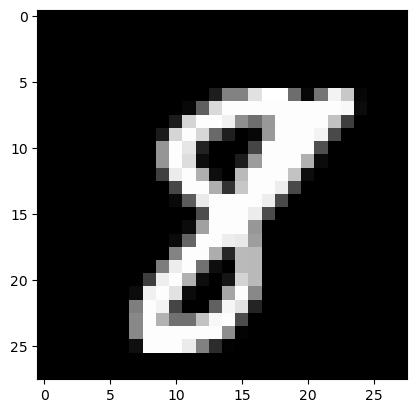

In [11]:
plt.imshow(train_images[55],cmap='gray')

In [12]:
train_labels[54]

9

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
# Normalize data

In [15]:
train_images=train_images/255.0 #Her rakamı rgb de 255 e kadar değer aldığından 255 e bölersek değeri normalizasyon yapmış oluruz.
test_images=test_images/255.0

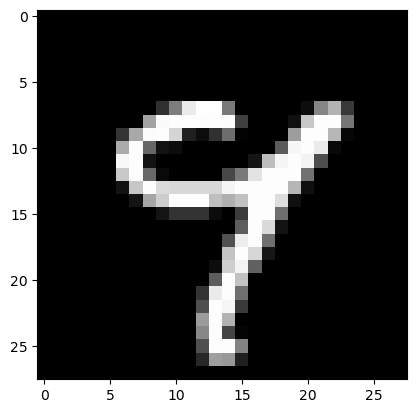

In [18]:
plt.imshow(train_images[54],cmap='gray')

In [20]:
# Convolutional Neural Networks - CNNs - Image Classification Resim Sınıflandırma 

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Reshape,BatchNormalization

In [27]:
from keras.src.layers import InputLayer

model=Sequential()
model.add(InputLayer(input_shape=(28,28)))
model.add(Reshape(target_shape=(28,28,1)))
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10)) # 10 farklı cevap classification 0-9 a kadar olarn rakamlar
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [28]:
model.fit(train_images,train_labels,validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8551 - loss: 0.5290 - val_accuracy: 0.9677 - val_loss: 0.1228
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9626 - loss: 0.1279 - val_accuracy: 0.9772 - val_loss: 0.0842
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9732 - loss: 0.0917 - val_accuracy: 0.9815 - val_loss: 0.0727
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9777 - loss: 0.0756 - val_accuracy: 0.9822 - val_loss: 0.0662
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9814 - loss: 0.0614 - val_accuracy: 0.9835 - val_loss: 0.0664
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9835 - loss: 0.0536 - val_accuracy: 0.9818 - val_loss: 0.0663
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9856 - loss: 0.0481 - val_accuracy: 0.9842 - val_loss: 0.0600
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9869 - loss: 0.0417 - 

In [29]:
loss, accuracy = model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.9758 - loss: 0.0776


In [30]:
accuracy

0.9805999994277954

In [33]:
model.save('model.h5')

In [36]:
# Tek satırlar tüm sütunları okuma  
df=tf.keras.utils.image_dataset_from_directory('Horse')  #Kalsör adını girmen yeterli sonra fit predict yapıyorsun ister cep telefonu na oluştur ister web sayfasına 

Found 99 files belonging to 1 classes.


In [37]:
df

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [38]:
# Large Language Models - ChatGPT veya Gemini 

In [43]:
#Deep Lerning de Başarı oranımızı artırma teknikleri
# 1- Layers sayısını artır
# 2- Neuron Sayısını arttır
# 3- Dropout layer ekliyoruz Overfittingi engeller ve daha iyi öğrenmeyi sağlar 

In [44]:
from keras.src.layers import InputLayer

model=Sequential()
model.add(InputLayer(input_shape=(28,28)))
model.add(Reshape(target_shape=(28,28,1)))
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization()) #başarı oranını yükseltiyor
model.add(Dense(60)) # 10 farklı cevap classification 0-9 a kadar olarn rakamlar
model.add(Dropout(0.25))
model.add(Dense(10)) # 10 farklı cevap classification 0-9 a kadar olarn rakamlar
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
